Dataset taken from **Kaggle**<br>
https://www.kaggle.com/datasets/prosperchuks/health-dataset <br><br>

**Dataset info:**

*INDEPENDENT VARIABLES:*<br>
Categorical: **'Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP'**<br>
Numerical: **'BMI', 'MentHlth', 'PhysHlth'**<br>

*DEPENDENT VARIABLE:* **'Diabetes'**

# ML Flowchart
<img src="../ML_steps.png">

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [11]:
# To read the data and form dataframe
import pandas as pd

# Train Test Split
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import classification_report

# Read Data

In [12]:
# Read Data from file path '../database/classification_hypertension_data.csv'
raw_df = pd.read_csv("../database/classification_diabetes_data.csv")

# See how the data appears
raw_df.head(2)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
# See the data shape
print(raw_df.shape)

(70692, 18)


In [14]:
categorical_columns = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP']
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']

# Clean Data
---
### Check for missing & duplicate values

In [15]:
# check for missing values
print(raw_df.isna().sum())

# remove duplicates
raw_df.drop_duplicates(inplace=True)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


After the check, we see there are no missing values

---
### Check for outliers

<AxesSubplot:>

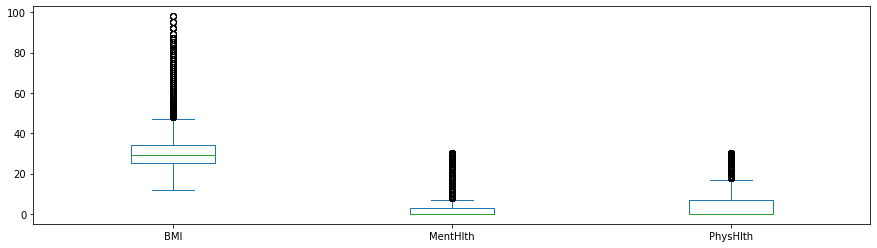

In [16]:
raw_df[numerical_columns].plot(kind="box", figsize=(15, 4))

We see that outliers are present in 'BMI', 'MentHlth', 'PhysHlth'

In [17]:
# Form list of columns where we see outliers
outlier_cols = ['BMI', 'MentHlth', 'PhysHlth']

outlier_df = raw_df[outlier_cols].copy()

In [18]:
# let us create a function where we replace the outlier values with min max values for their reapective feature

# Form permissible min max values based on Inter Quartile Range (IQR)
q1 = outlier_df.quantile(0.25)
q3 = outlier_df.quantile(0.75)
iqr = q3 - q1
permissible_maxima = q3 + 1.5 * iqr
permissible_minima = q1 - 1.5 * iqr


def process_outlier(value: float, min_val: float, max_val: float) -> float:
    """
    Info: returns the permissible value based on min max values.
    
    Arguments:
        value (float): input value to check
        min_val (float): minimum permissible value
        max_val (float): maximum permissible value
    
    Returns:
        float: value if the value lies between minimum and maximum value else minimum or maximum value.
    """
    if value < min_val:
        return min_val
    elif value > max_val:
        return max_val
    else:
        return value

In [19]:
# Loop over the columns to process their outliers
for col_name in outlier_cols:
    raw_df[col_name] = raw_df[col_name].apply(
        lambda x: process_outlier(
            value=x,
            min_val=permissible_minima[col_name],
            max_val=permissible_maxima[col_name],
        )
    )

### Check for outliers

<AxesSubplot:>

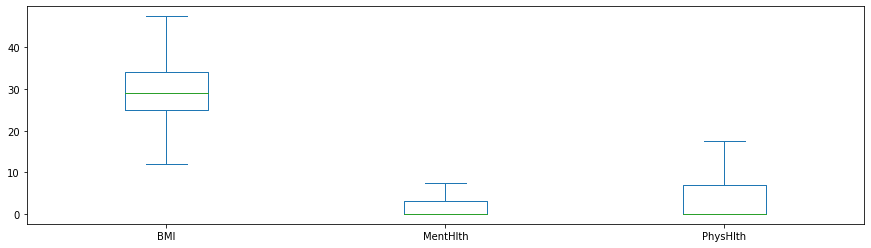

In [20]:
raw_df[numerical_columns].plot(kind="box", figsize=(15, 4))

---
### Check correlations

In [21]:
raw_df.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.003824,0.223167,0.106278,-0.048246,0.092337,0.226255,-0.098995,0.069133,-0.014837,-0.061587,0.144833,-0.153090,0.083458,0.200587,0.127761,0.322424,0.268049
Sex,-0.003824,1.000000,0.006887,-0.008544,-0.006726,0.107986,0.098797,0.055065,-0.085119,-0.053576,0.016574,-0.023970,-0.122339,-0.062454,-0.086296,0.004353,0.031179,0.035165
HighChol,0.223167,0.006887,1.000000,0.092838,0.122825,0.075290,0.174835,-0.075553,-0.034327,-0.030917,-0.030983,0.213129,0.066168,0.142724,0.154102,0.097449,0.290340,0.264501
CholCheck,0.106278,-0.008544,0.092838,1.000000,0.056958,-0.001440,0.048907,-0.015243,0.012657,-0.004777,-0.025547,0.071569,-0.005780,0.044174,0.052976,0.026230,0.112712,0.126594
BMI,-0.048246,-0.006726,0.122825,0.056958,1.000000,-0.006667,0.049982,-0.153890,-0.066274,-0.040372,-0.070817,0.248191,0.086061,0.151303,0.235787,0.012520,0.237618,0.293918
Smoker,0.092337,0.107986,0.075290,-0.001440,-0.006667,1.000000,0.115345,-0.064476,-0.059478,-0.016851,0.075661,0.129935,0.062236,0.106326,0.107859,0.059712,0.066900,0.062325
HeartDiseaseorAttack,0.226255,0.098797,0.174835,0.048907,0.049982,0.115345,1.000000,-0.082421,-0.004631,-0.022844,-0.043898,0.262446,0.044150,0.185970,0.219905,0.218692,0.203429,0.202174
PhysActivity,-0.098995,0.055065,-0.075553,-0.015243,-0.153890,-0.064476,-0.082421,1.000000,0.113476,0.129660,0.029473,-0.245422,-0.089157,-0.207484,-0.255267,-0.068082,-0.118643,-0.138712
Fruits,0.069133,-0.085119,-0.034327,0.012657,-0.066274,-0.059478,-0.004631,0.113476,1.000000,0.224769,-0.026307,-0.065993,-0.042919,-0.024276,-0.028066,0.001821,-0.021387,-0.031330
Veggies,-0.014837,-0.053576,-0.030917,-0.004777,-0.040372,-0.016851,-0.022844,0.129660,0.224769,1.000000,0.030034,-0.087571,-0.023963,-0.041349,-0.062799,-0.037732,-0.051518,-0.061857


# Form *features* and *target*

In [22]:
features = raw_df[raw_df.columns.tolist()[:-1]]
target = raw_df[raw_df.columns.tolist()[-1]]

# Train Test Split

In [23]:
train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.2, random_state=42
)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(51216, 17) (12804, 17) (51216,) (12804,)


# Normalize Data

In [24]:
scaler = StandardScaler()
train_x[numerical_columns] = scaler.fit_transform(train_x[numerical_columns])
test_x[numerical_columns] = scaler.transform(test_x[numerical_columns])

# Train Model

In [25]:
# create model
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=200)
sv_model = SVC()

In [26]:
# Fit and train the model
lr_model.fit(train_x, train_y)
rf_model.fit(train_x, train_y)
sv_model.fit(train_x, train_y)

SVC()

# Model Evaluation

In [27]:
y_pred_lr = lr_model.predict(test_x)
y_pred_rf = rf_model.predict(test_x)
y_pred_sv = sv_model.predict(test_x)

In [28]:
print("Logistic Regression:")
print(f"\nClassification Report:{classification_report(y_pred_lr, test_y)}\n\n")
print("Random Forest:")
print(f"\nClassification Report:{classification_report(y_pred_rf, test_y)}\n\n")
print("Support Vector:")
print(f"\nClassification Report:{classification_report(y_pred_sv, test_y)}\n\n")

Logistic Regression:

Classification Report:              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72      5795
         1.0       0.77      0.74      0.76      7009

    accuracy                           0.74     12804
   macro avg       0.73      0.74      0.74     12804
weighted avg       0.74      0.74      0.74     12804



Random Forest:

Classification Report:              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66      5567
         1.0       0.75      0.70      0.72      7237

    accuracy                           0.70     12804
   macro avg       0.69      0.70      0.69     12804
weighted avg       0.70      0.70      0.70     12804



Support Vector:

Classification Report:              precision    recall  f1-score   support

         0.0       0.65      0.77      0.70      5043
         1.0       0.83      0.72      0.77      7761

    accuracy                           0.74     12804
   

# Author
Shounak Deshpande<br>
shounak.python@gmail.com